In [22]:
!pip install matplotlib numpy scipy

Defaulting to user installation because normal site-packages is not writeable


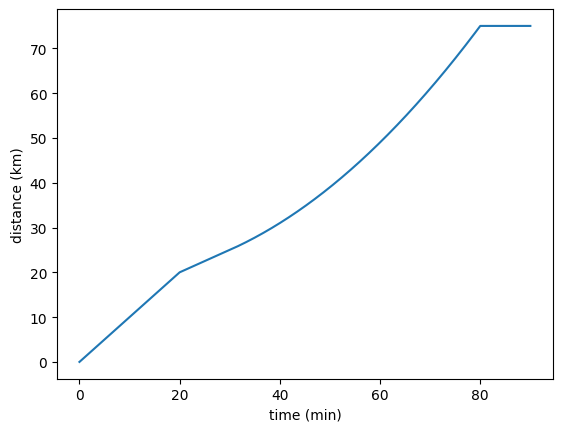

In [23]:
import matplotlib.pyplot as plt
import numpy as np

def distanceTravelled(t):
    if (t < 20):
        return t
    if (t < 30):
        return 20 + (t - 20) / 2
    else:
        return min(25 + (t - 30) / 2 + (t - 30) * (t - 30) / 100, 75)

t = np.linspace(0,90, 1000)
distanceTravelled_np = np.vectorize(distanceTravelled)
distance = distanceTravelled_np(t)

plt.plot(t, distance)
plt.xlabel('time (min)')
plt.ylabel('distance (km)')
plt.show()

### What is an integral

Before we can integrate a function, we need to understand the inverse operation: differentiation. To differentiate a function means to find the rate at which it changes in value per unit we change the input by. Suppose you travel 75 kilometres in 90 minutes by car. The exact distance you've travelled can be modelled as a function of time, as seen above. So at any point in time we know how far we have travelled. What if we wanted to know the exact speed at a given point in time? The operation that allows us to find this is the **derivative**:

$$
f'(a) = \lim_{h \to 0} \frac{f(a+h) - f(a)}{h}
$$

And if we had a function of speed or velocity, the operation to get distance is called the integral (or antiderivative):

$$
\int_{a}^{b} v(t)\, dt = \lim_{n \to \infty} \sum_{i=1}^{n} v(t_i^*) \Delta t
$$

where $\Delta t = \frac{b-a}{n}$ and $t_i^*$ is a point in the $i$-th sub-interval (this is the Riemann sum definition). (hint: if starting at 0 $t_i^*$ can be equal to $n*\Delta t$)

Geometrically, the definite integral $\int_{a}^{b} f(x)\, dx$ represents the **signed area** under the curve $y = f(x)$ from $x = a$ to $x = b$.

The **Fundamental Theorem of Calculus** links the two operations beautifully:

> If $F(x)$ is any antiderivative of $f(x)$ (i.e., $F'(x) = f(x)$), then  
> $$
 \int_{a}^{b} f(x)\, dx = F(b) - F(a)
 $$

As you can already see, even very simple problems can be done with derivatives and integrals. Now define a function that computes the derivative of the distance at a specific point in time, and test it against the numpy version (hint we want to take the value of the function at two nearby points and find the avg speed between them):

In [24]:
def derivative(f, a, precision = 1e-6):
    return (f(a + precision) - f(a)) / precision

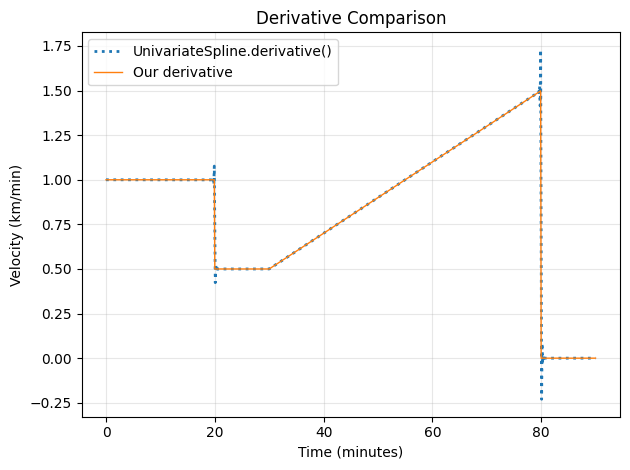

In [25]:
from scipy.interpolate import UnivariateSpline

def derivativeWrapper(t):
    return derivative(distanceTravelled_np, t)
    
derivativeVec = np.vectorize(derivativeWrapper)
ourDerivative = derivativeWrapper(t)
s = distanceTravelled_np(t)

# Method 1: Use spline + exact derivative (very accurate and clean)
spline = UnivariateSpline(t, s, k=4, s=0)   # 4th order spline through all points
scipyDerivative = spline.derivative(n=1)

plt.plot(t, scipyDerivative(t), ':', linewidth=2,   label='UnivariateSpline.derivative()')
plt.plot(t, ourDerivative, linewidth=1,   label='Our derivative')
plt.xlabel('Time (minutes)')
plt.ylabel('Velocity (km/min)')
plt.title('Derivative Comparison')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

(Ignore the spikes on the scipy derivative, I'm not sure why those are there)

### Integral coding

Now, given a level of accuracy $delta$, and a function g, create a function that finds the integral, or area under the curve, from 0 to the point $x$.

In [42]:
def Integrate(g, x, delta = 1e-3):
    Integral = 0.0
    if (x < 0):
        return 0
    steps = int(x / delta)
    for i in range(steps):
        Integral += g(i * delta) * delta
    return Integral

Now let's test your function:

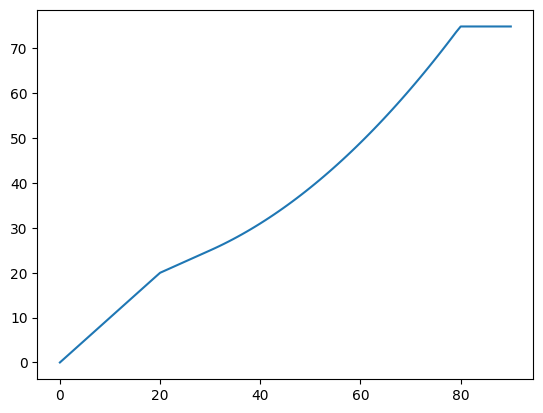

In [43]:
def derivative(t):
    return ourDerivative[min(int(t/90*1000),999)]

def IntegrateWrapper(t):
    return Integrate(derivative, t)

IntegrateVec = np.vectorize(IntegrateWrapper)
t = np .linspace(0, 90, 100)
plt.plot(t, IntegrateVec(t))
plt.show()

If your integral function is correct the plot should look very similar to our original plot